In [20]:
from collections import defaultdict
import pickle
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt

from sodapy import Socrata

### Chicago
Data source for Chicago:

https://data.cityofchicago.org/Health-Human-Services/COVID-19-Daily-Cases-and-Deaths/naz8-j4nc

There is an API that I will use to generate just the date and the number of deaths, starting with February 1.

In [2]:
client = Socrata("data.cityofchicago.org", None)

In [3]:
results = client.get("naz8-j4nc", limit=2000)

In [4]:
results_df = pd.DataFrame.from_records(results)

In [5]:
results_df.dropna(inplace=True)

In [6]:
def get_days_since_feb_1(date_str):
    dt = datetime.strptime(date_str,
                           '%Y-%m-%dT%H:%M:%S.%f')
    return (dt - datetime(2020, 2, 1)).days

In [7]:
results_df['days_since_feb_1'] = results_df['lab_report_date'].apply(get_days_since_feb_1)

In [8]:
num_days = results_df['days_since_feb_1'].max()

In [9]:
results_df.set_index('days_since_feb_1', inplace=True)

In [10]:
def get_deaths(days_since_feb_1, df=results_df):
    if days_since_feb_1 in df.index:
        return int(df.loc[days_since_feb_1]['deaths_total'])
    else:
        return 0

In [11]:
index = [datetime(2020, 2, 1) + timedelta(days=days) for days in range(num_days+1)]
deaths = [get_deaths(days) for days in range(num_days+1)]

In [12]:
chi_death_df = pd.DataFrame(deaths,
                       index=index,
                       columns=['deaths'])

In [13]:
chi_death_df

,deaths
2020-02-01,0
2020-02-02,0
2020-02-03,0
2020-02-04,0
2020-02-05,0
...,...
2020-06-02,20
2020-06-03,16
2020-06-04,12
2020-06-05,8


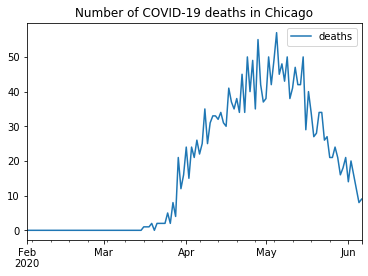

In [23]:
chi_death_df.plot(title='Number of COVID-19 deaths in Chicago')
plt.show()

#### Check the diff

In [14]:
prev_df = pd.read_pickle('../data/chi_deaths.pickle')

In [16]:
diff = chi_death_df - prev_df

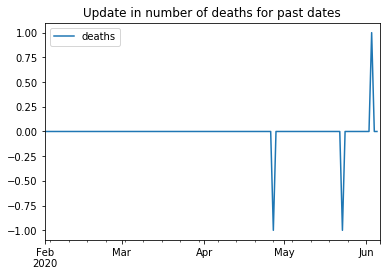

In [25]:
diff.plot(title='Update in number of deaths for past dates')
plt.show()

There's almost no update for past dates today.

In [19]:
chi_death_df.to_pickle('../data/chi_deaths.pickle')